<>:37: SyntaxWarning: invalid escape sequence '\p'
<>:37: SyntaxWarning: invalid escape sequence '\p'
/var/folders/kk/7w6727t942z6xwr_96jpcwtc0000gn/T/ipykernel_6405/3949929867.py:37: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel('$\pi(p, L)$')


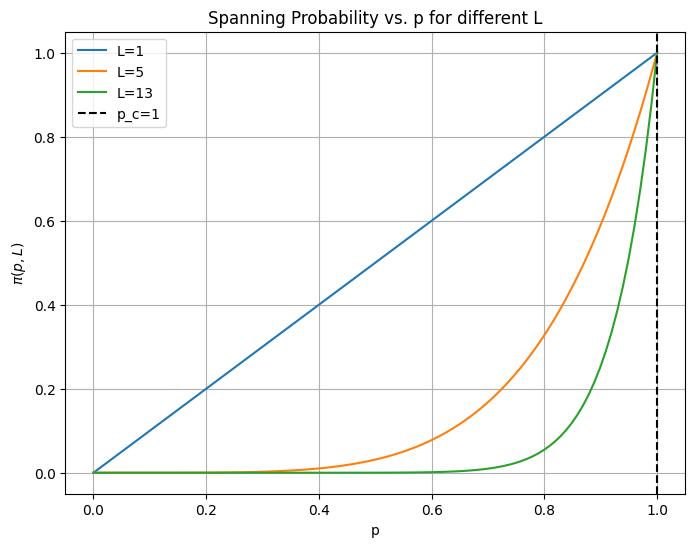

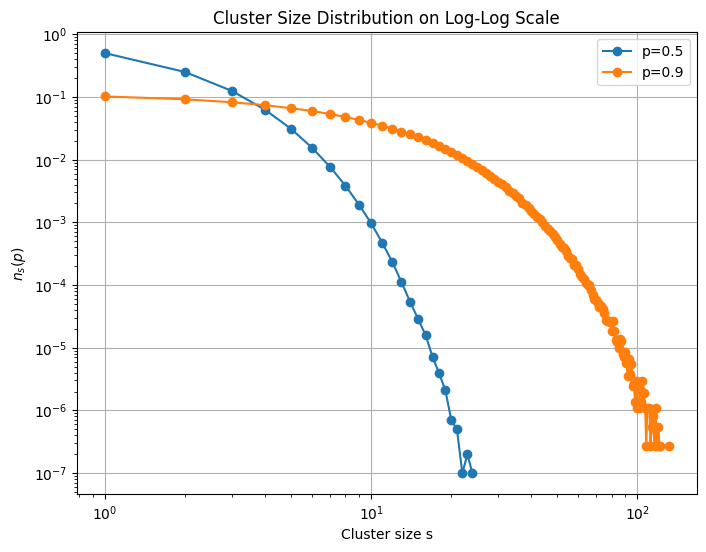

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def spanning_probability(p, L):
    return p**L

def simulate_cluster_distribution(L, p, num_samples=100000):
    cluster_sizes = []
    for _ in range(num_samples):
        lattice = np.random.rand(L) < p  # Generate a random lattice
        sizes = []
        size = 0
        for site in lattice:
            if site:
                size += 1
            else:
                if size > 0:
                    sizes.append(size)
                size = 0
        if size > 0:
            sizes.append(size)
        cluster_sizes.extend(sizes)
    
    unique_sizes, counts = np.unique(cluster_sizes, return_counts=True)
    return unique_sizes, counts / np.sum(counts)


L_values = [1, 5, 13]
p_values = np.linspace(0, 1, 100)


plt.figure(figsize=(8, 6))
for L in L_values:
    plt.plot(p_values, spanning_probability(p_values, L), label=f'L={L}')
plt.axvline(1, color='k', linestyle='--', label='p_c=1')
plt.xlabel('p')
plt.ylabel('$\pi(p, L)$')
plt.title('Spanning Probability vs. p for different L')
plt.legend()
plt.grid()
plt.show()


p_values_cluster = [0.5,0.9]
L_cluster = 400  
plt.figure(figsize=(8, 6))
for p in p_values_cluster:
    s_values, ns_values = simulate_cluster_distribution(L_cluster, p)
    plt.loglog(s_values, ns_values, marker='o', linestyle='-', label=f'p={p}')
plt.xlabel('Cluster size s')
plt.ylabel('$n_s(p)$')
plt.title('Cluster Size Distribution on Log-Log Scale')
plt.legend()
plt.grid()
plt.show()
